In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
plt.xkcd()

## Population class for simulating the simple Yard Sale Model (YSM)

### Algorithm: 

1) Initialize a population of chosen size where all members possess equal total wealth in arbitray units. 

2) Draw a random pair of individuals from the population:

    a) Draw a random fraction and multiply it by the lesser (or equal) wealth value of the two indviduals.
    
    b) Flip a fair coin (set to 50% chance of winning for each individual). Subtract the amount from step a from the loser and give it to the winner.
    
3) Repat step 2 for a defined number of iterations and collect all the results. 
    

In [2]:
class Population(object): 
    """Class that holds a population of of individuals with wealth. Methods to simulate asset exchange."""
    
    def __init__(self, N, start):
        """Initialize an instance of the Population class."""
        
        self.pop = []
        self.IDs = []
        self.snapshots = []
        self.N = N
        
        for i in range(N):
            self.pop.append(start)
            
        for i in range(len(self.pop)):
            self.IDs.append(i)

    def exchange(self, iterations, gr=0.02):
        """Conduct asset exchange between all agents obeying the specified rules."""
        
        for i in range(iterations):
            # Keep a record of the wealth distribution at each iteration
            self.snapshots.append(deepcopy(self.pop))
            
            # Randomly select a pair of individuals from the population
            pair = list(np.random.choice(self.IDs, 2))
            
            # Draw a random fraction to be taken from one individual's wealth
            fraction = np.random.rand()
            
            # Compare the total wealth of the two individuals and multiply the random fraction by the lowest
            if self.pop[pair[0]] < self.pop[pair[1]]:
                cost = self.pop[pair[0]]*fraction
                
            elif self.pop[pair[0]] > self.pop[pair[1]]:
                cost = self.pop[pair[1]]*fraction
                
            else:
                cost = self.pop[pair[0]]*fraction
            
            # Flip a fair coin to decide which individual wins the transaction
            coin_toss = np.random.choice(["heads", "tails"])
            
            if coin_toss == "heads":
                self.pop[pair[0]] += cost
                self.pop[pair[1]] -= cost
                
            else:
                self.pop[pair[1]] += cost
                self.pop[pair[0]] -= cost

In [3]:
# Run an ensemble of simulations
multi = []
for i in range(25):
    P = Population(N=100, start=100)
    P.exchange(iterations=2501)
    multi.append(P.snapshots)
    
# Calculate median at each step across all the simulations  
multi_medians = []
for m in multi:    
    medians = []
    for a in m:
        medians.append(np.median(a))
    multi_medians.append(medians)
    
# Calculate wealthiest individual at each step across all the simulations  
top = []
for m in multi:    
    t = []
    for a in m:
        t.append(max(a))
    top.append(t)
    
    
# Calculate wealthiest individual minus the median at each step across all the simulations  
diff = []
for m in multi:    
    t = []
    for a in m:
        MAX = max(a)
        MEDIAN = np.median(a)
        DIFF = MAX-MEDIAN
        t.append(DIFF)
    diff.append(t)
    
# Calculate wealthiest individual minus the median at each step across all the simulations  
ratio = []
for m in multi:    
    t = []
    for a in m:
        MAX = max(a)
        MEDIAN = np.median(a)
        DIFF = MAX/MEDIAN
        t.append(DIFF)
    ratio.append(t)
    
# Calculate wealthiest individual minus the median at each step across all the simulations  
rng = []
for m in multi:    
    t = []
    for a in m:
        MAX = max(a)
        MIN = min(a)
        DIFF = MAX - MIN
        t.append(DIFF)
    rng.append(t)
    
# Calculate the 20:20 ratio metric 
ttr = []
for m in multi:    
    t = []
    for a in m:
        # find the top and bottom 20 values (20%)
        a = np.array(a)
        top20_ind = list(np.argpartition(a, -20)[-20:])
        bot20_ind = list(np.argpartition(a, 20)[:20])
        
        #print(top20_ind)
        #print(bot20_ind)
        
        top20 = np.sum(a[top20_ind])
        bot20 = np.sum(a[bot20_ind])  
        
        r = top20/bot20
        t.append(r)
    ttr.append(t)

In [4]:
#diff = np.array(top) - np.array(multi_medians)
#ratio = np.array(top)/np.array(multi_medians)

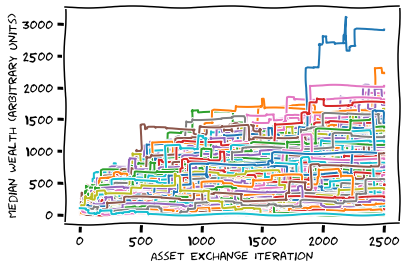

In [5]:
for m in multi:
    plt.plot(m)
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0, 110)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Median Wealth (arbitrary units)", fontsize=12);
plt.savefig("YSM_traj-abs-xkcd-NoGrowth.pdf", format="pdf")

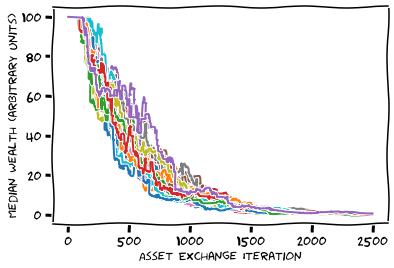

In [6]:
for m in multi_medians:
    plt.plot(m)
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0, 110)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Median Wealth (arbitrary units)", fontsize=12);
plt.savefig("YSM_median-xkcd-NoGrowth.pdf", format="pdf")

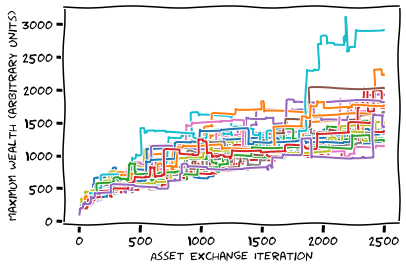

In [7]:
for i in range(len(multi_medians)):
    plt.plot(top[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum Wealth (arbitrary units)", fontsize=12);
plt.savefig("YSM_maximum-xkcd-NoGrowth.pdf", format="pdf")

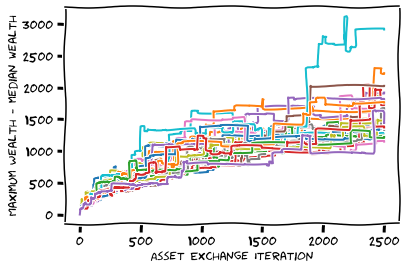

In [8]:
for i in range(len(diff)):
    plt.plot(diff[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
#plt.xlim(2200, 2500)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum Wealth - median wealth", fontsize=12);
plt.savefig("YSM_maximum-median-xkcd-NoGrowth.pdf", format="pdf")

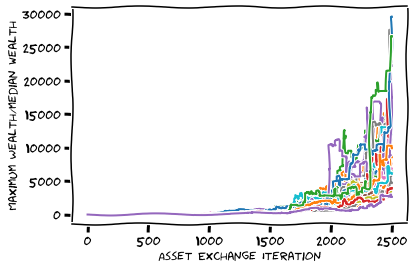

In [9]:
for i in range(len(ratio)):
    plt.plot(ratio[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
#plt.xlim(0, 200)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum Wealth/median wealth", fontsize=12);
plt.savefig("YSM_maximum_over_median-xkcd-NoGrowth.pdf", format="pdf")

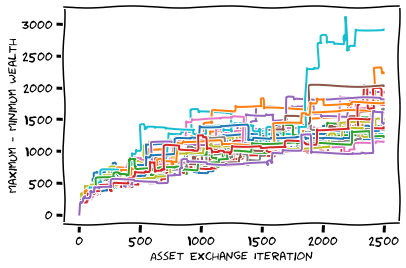

In [10]:
for i in range(len(rng)):
    plt.plot(rng[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
#plt.xlim(0, 200)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum - Minimum Wealth", fontsize=12);
plt.savefig("YSM_maximum-min-xkcd-NoGrowth.pdf", format="pdf")

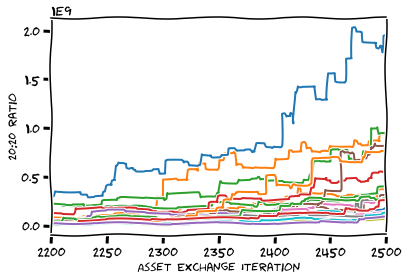

In [11]:
for i in range(len(ttr)):
    plt.plot(ttr[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
#plt.xlim(2200, 2500)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("20:20 ratio", fontsize=12);
plt.savefig("YSM_20-20-ratio-xkcd-NoGrowth.pdf", format="pdf")

## Add growth into the model 

In [12]:
class Population(object): 
    """Class that holds a population of of individuals with wealth. Methods to simulate asset exchange."""
    
    def __init__(self, N, start):
        """Initialize an instance of the Population class."""
        
        self.pop = []
        self.IDs = []
        self.snapshots = []
        self.N = N
        
        for i in range(N):
            self.pop.append(start)
            
        for i in range(len(self.pop)):
            self.IDs.append(i)

    def exchange(self, iterations, gr=0.001):
        """Conduct asset exchange between all agents obeying the specified rules."""
        
        for i in range(iterations):
            # Keep a record of the wealth distribution at each iteration
            self.snapshots.append(deepcopy(self.pop))
            #print(self.pop)
            # Pull an increase number from the growth function (default is 2% growth)
            tot = np.sum(self.pop)
            growth = tot*gr
            g_per_i = growth/self.N
            
            # Equally distribute the growth amount across the individuals
            self.pop += g_per_i
            #print(self.pop)
            # Randomly select a pair of individuals from the population
            pair = list(np.random.choice(self.IDs, 2))
            
            # Draw a random fraction to be taken from one individual's wealth
            fraction = np.random.rand()
            
            # Compare the total wealth of the two individuals and multiply the random fraction by the lowest
            if self.pop[pair[0]] < self.pop[pair[1]]:
                cost = self.pop[pair[0]]*fraction
                
            elif self.pop[pair[0]] > self.pop[pair[1]]:
                cost = self.pop[pair[1]]*fraction
                
            else:
                cost = self.pop[pair[0]]*fraction
            
            # Flip a fair coin to decide which individual wins the transaction
            coin_toss = np.random.choice(["heads", "tails"])
            
            if coin_toss == "heads":
                self.pop[pair[0]] += cost
                self.pop[pair[1]] -= cost
                
            else:
                self.pop[pair[1]] += cost
                self.pop[pair[0]] -= cost

In [13]:
# Run an ensemble of simulations
multi = []
for i in range(25):
    P = Population(N=100, start=100)
    P.exchange(iterations=2501)
    multi.append(P.snapshots)
    
# Calculate median at each step across all the simulations  
multi_medians = []
for m in multi:    
    medians = []
    for a in m:
        medians.append(np.median(a))
    multi_medians.append(medians)
    
# Calculate wealthiest individual at each step across all the simulations  
top = []
for m in multi:    
    t = []
    for a in m:
        t.append(max(a))
    top.append(t)
    
    
# Calculate wealthiest individual minus the median at each step across all the simulations  
diff = []
for m in multi:    
    t = []
    for a in m:
        MAX = max(a)
        MEDIAN = np.median(a)
        DIFF = MAX-MEDIAN
        t.append(DIFF)
    diff.append(t)
    
# Calculate wealthiest individual minus the median at each step across all the simulations  
ratio = []
for m in multi:    
    t = []
    for a in m:
        MAX = max(a)
        MEDIAN = np.median(a)
        DIFF = MAX/MEDIAN
        t.append(DIFF)
    ratio.append(t)
    
# Calculate wealthiest individual minus the median at each step across all the simulations  
rng = []
for m in multi:    
    t = []
    for a in m:
        MAX = max(a)
        MIN = min(a)
        DIFF = MAX - MIN
        t.append(DIFF)
    rng.append(t)

# Calculate the 20:20 ratio metric 
ttr = []
for m in multi:    
    t = []
    for a in m:
        # find the top and bottom 20 values (20%)
        a = np.array(a)
        top20_ind = list(np.argpartition(a, -20)[-20:])
        bot20_ind = list(np.argpartition(a, 20)[:20])
        
        #print(top20_ind)
        #print(bot20_ind)
        
        top20 = np.sum(a[top20_ind])
        bot20 = np.sum(a[bot20_ind])  
        
        r = top20/bot20
        t.append(r)
    ttr.append(t)
    


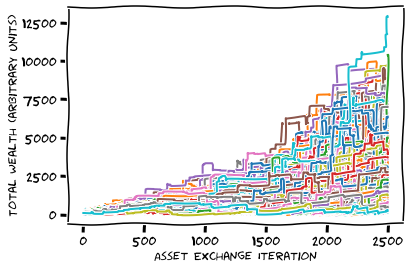

In [29]:
for m in multi:
    plt.plot(m)
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0, 110)
#plt.xlim(2200, 2500)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Total Wealth (arbitrary units)", fontsize=12);
plt.savefig("YSM_traj-abs-xkcd-WithGrowth.pdf", format="pdf")

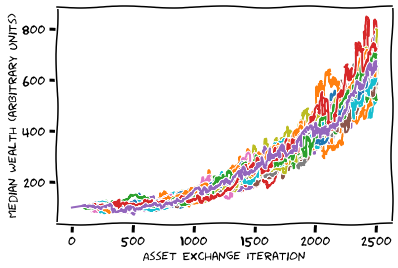

In [28]:
for m in multi_medians:
    plt.plot(m)
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0, 110)
#plt.xlim(2200,2500)

plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Median Wealth (arbitrary units)", fontsize=12);
plt.savefig("YSM_median-xkcd-WithGrowth.pdf", format="pdf")

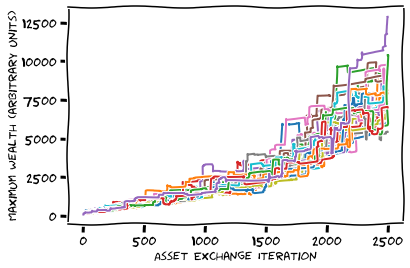

In [27]:
for i in range(len(multi_medians)):
    plt.plot(top[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.xlim(2200,2500)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum Wealth (arbitrary units)", fontsize=12);
plt.savefig("YSM_maximum-xkcd-WithGrowth.pdf", format="pdf")

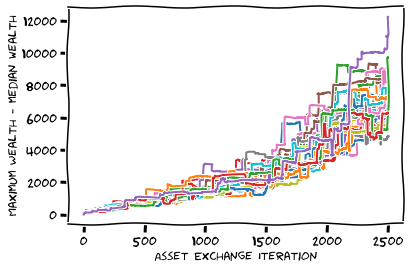

In [26]:
for i in range(len(diff)):
    plt.plot(diff[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
#plt.xlim(2200, 2500)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum Wealth - median wealth", fontsize=12);
plt.savefig("YSM_maximum-median-xkcd-WithGrowth.pdf", format="pdf")

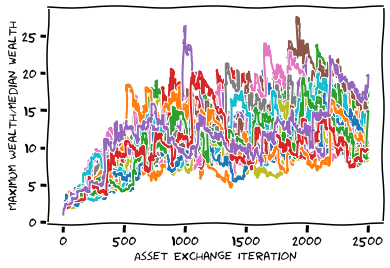

In [25]:
for i in range(len(ratio)):
    plt.plot(ratio[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
#plt.xlim(0, 200)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum Wealth/median wealth", fontsize=12);
plt.savefig("YSM_maximum_over_median-xkcd-WithGrowth.pdf", format="pdf")

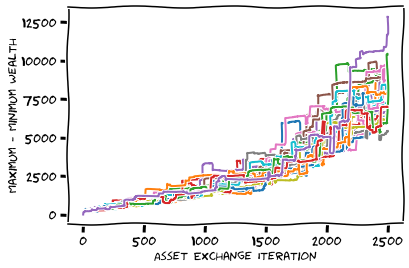

In [30]:
for i in range(len(rng)):
    plt.plot(rng[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
#plt.xlim(2200, 2500)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("Maximum - Minimum Wealth", fontsize=12);
plt.savefig("YSM_maximum-min-xkcd-WithGrowth.pdf", format="pdf")

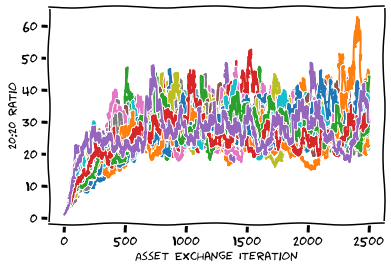

In [20]:
for i in range(len(ttr)):
    plt.plot(ttr[i])
    
#plt.title("Wealth trajectories in the Yard Sale Model (YSM)", fontsize=14)
#plt.ylim(0,2900)
#plt.xlim(2200, 2500)
plt.xlabel("Asset Exchange Iteration", fontsize=12)
plt.ylabel("20:20 ratio", fontsize=12);
plt.savefig("YSM_20-20-ratio-xkcd-WithGrowth.pdf", format="pdf")